In [15]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
con=sqlite3.connect('database.sqlite')

In [5]:
df=pd.read_sql_query("SELECT * FROM Player_Attributes",con)

In [6]:
df.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

      ...       vision  penalties  marking  standing_tackle  sliding_tackle  \
0     ...         54.0       48.0     65.0             69.0            69.0   
1     ...         54.0       48.0     65.0             69.0            69.0   
2     ...         54.0       48.0     65.0             66.0            69.0   
3     ...         53.0       47.0     62.0             63.0            66.0   
4     ...         53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

In [7]:
df.shape

(183978, 42)

In [13]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
df.isnull().values.any()

True

In [19]:
drpcol=['id', 'player_fifa_api_id', 'player_api_id']

In [22]:
df2=df.dropna()
df2.drop(drpcol,axis=1,inplace=True)

In [23]:
df2.shape

(180354, 39)

In [35]:
df2.head()

date  overall_rating  potential preferred_foot  \
0  2016-02-18 00:00:00            67.0       71.0          right   
1  2015-11-19 00:00:00            67.0       71.0          right   
2  2015-09-21 00:00:00            62.0       66.0          right   
3  2015-03-20 00:00:00            61.0       65.0          right   
4  2007-02-22 00:00:00            61.0       65.0          right   

  attacking_work_rate defensive_work_rate  crossing  finishing  \
0              medium              medium      49.0       44.0   
1              medium              medium      49.0       44.0   
2              medium              medium      49.0       44.0   
3              medium              medium      48.0       43.0   
4              medium              medium      48.0       43.0   

   heading_accuracy  short_passing     ...       vision  penalties  marking  \
0              71.0           61.0     ...         54.0       48.0     65.0   
1              71.0           61.0     ...         54.0       48.0     65.0   
2              71.0           61.0     ...         54.0       48.0     65.0   
3              70.0           60.0     ...         53.0       47.0     62.0   
4              70.0           60.0     ...         53.0       47.0     62.0   

   standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
0             69.0            69.0        6.0         11.0        10.0   
1             69.0            69.0        6.0         11.0        10.0   
2             66.0            69.0        6.0         11.0        10.0   
3             63.0            66.0        5.0         10.0         9.0   
4             63.0            66.0        5.0         10.0         9.0   

   gk_positioning  gk_reflexes  
0             8.0          8.0  
1             8.0          8.0  
2             8.0          8.0  
3             7.0          7.0  
4             7.0          7.0  

[5 rows x 39 columns]

In [30]:
cat_data=df.dtypes[df.dtypes=='object'].index
cat_data

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [39]:
lc=[3,4,5]

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in lc:
    df2.iloc[:, i] = labelencoder.fit_transform(df2.iloc[:, i])

C:\Users\abhinav\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
df2.head()

date  overall_rating  potential  preferred_foot  \
0  2016-02-18 00:00:00            67.0       71.0               1   
1  2015-11-19 00:00:00            67.0       71.0               1   
2  2015-09-21 00:00:00            62.0       66.0               1   
3  2015-03-20 00:00:00            61.0       65.0               1   
4  2007-02-22 00:00:00            61.0       65.0               1   

   attacking_work_rate  defensive_work_rate  crossing  finishing  \
0                    4                   14      49.0       44.0   
1                    4                   14      49.0       44.0   
2                    4                   14      49.0       44.0   
3                    4                   14      48.0       43.0   
4                    4                   14      48.0       43.0   

   heading_accuracy  short_passing     ...       vision  penalties  marking  \
0              71.0           61.0     ...         54.0       48.0     65.0   
1              71.0           61.0     ...         54.0       48.0     65.0   
2              71.0           61.0     ...         54.0       48.0     65.0   
3              70.0           60.0     ...         53.0       47.0     62.0   
4              70.0           60.0     ...         53.0       47.0     62.0   

   standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  \
0             69.0            69.0        6.0         11.0        10.0   
1             69.0            69.0        6.0         11.0        10.0   
2             66.0            69.0        6.0         11.0        10.0   
3             63.0            66.0        5.0         10.0         9.0   
4             63.0            66.0        5.0         10.0         9.0   

   gk_positioning  gk_reflexes  
0             8.0          8.0  
1             8.0          8.0  
2             8.0          8.0  
3             7.0          7.0  
4             7.0          7.0  

[5 rows x 39 columns]

In [48]:
df2.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

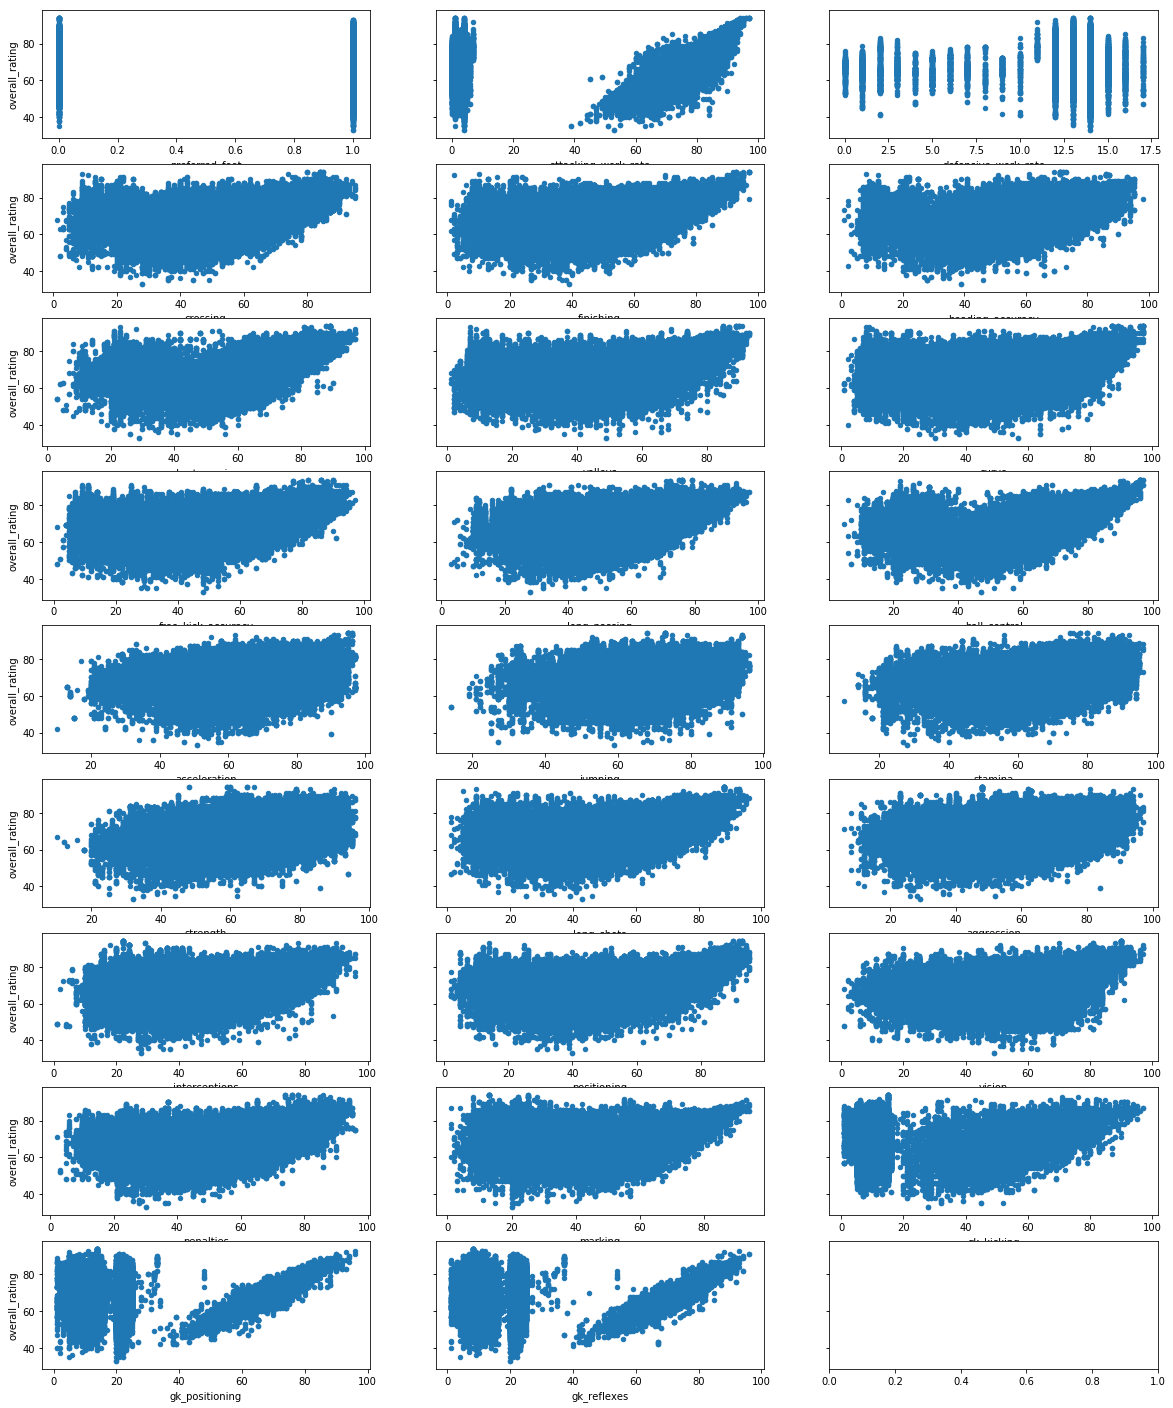

In [53]:
fig,axs=plt.subplots(9,3,sharey=True)
df2.plot(x='preferred_foot',y='overall_rating',kind='scatter',ax=axs[0,0],figsize=(20,25))
df2.plot(x='potential',y='overall_rating',kind='scatter',ax=axs[0,1])
df2.plot(x='attacking_work_rate',y='overall_rating',kind='scatter',ax=axs[0,1])
df2.plot(x='defensive_work_rate',y='overall_rating',kind='scatter',ax=axs[0,2])
df2.plot(x='crossing',y='overall_rating',kind='scatter',ax=axs[1,0])
df2.plot(x='finishing',y='overall_rating',kind='scatter',ax=axs[1,1])
df2.plot(x='heading_accuracy',y='overall_rating',kind='scatter',ax=axs[1,2])
df2.plot(x='short_passing',y='overall_rating',kind='scatter',ax=axs[2,0])
df2.plot(x='volleys',y='overall_rating',kind='scatter',ax=axs[2,1])
df2.plot(x='dribbling',y='overall_rating',kind='scatter',ax=axs[2,2])
df2.plot(x='curve',y='overall_rating',kind='scatter',ax=axs[2,2])
df2.plot(x='free_kick_accuracy',y='overall_rating',kind='scatter',ax=axs[3,0])
df2.plot(x='long_passing',y='overall_rating',kind='scatter',ax=axs[3,1])
df2.plot(x='ball_control',y='overall_rating',kind='scatter',ax=axs[3,2])
df2.plot(x='acceleration',y='overall_rating',kind='scatter',ax=axs[4,0])
df2.plot(x='jumping',y='overall_rating',kind='scatter',ax=axs[4,1])
df2.plot(x='stamina',y='overall_rating',kind='scatter',ax=axs[4,2])
df2.plot(x='strength',y='overall_rating',kind='scatter',ax=axs[5,0])
df2.plot(x='long_shots',y='overall_rating',kind='scatter',ax=axs[5,1])
df2.plot(x='aggression',y='overall_rating',kind='scatter',ax=axs[5,2])
df2.plot(x='interceptions',y='overall_rating',kind='scatter',ax=axs[6,0])
df2.plot(x='positioning',y='overall_rating',kind='scatter',ax=axs[6,1])
df2.plot(x='vision',y='overall_rating',kind='scatter',ax=axs[6,2])
df2.plot(x='penalties',y='overall_rating',kind='scatter',ax=axs[7,0])
df2.plot(x='marking',y='overall_rating',kind='scatter',ax=axs[7,1])
df2.plot(x='gk_kicking',y='overall_rating',kind='scatter',ax=axs[7,2])
df2.plot(x='gk_positioning',y='overall_rating',kind='scatter',ax=axs[8,0])
df2.plot(x='gk_reflexes',y='overall_rating',kind='scatter',ax=axs[8,1])

From above graphs we can derive that column preferred_foot is not having much impact on overall ratings.

In [56]:
from scipy import stats
import numpy as np

In [57]:
z=np.abs(stats.zscore(df2))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'